## VARIABLE TARGET: GASTOS MENSUALES 

Consideramos que puede ser de interés para algunos sectores empresariales comprender y pronosticar el gasto de los consumidores por varias razones. Los gastos mensuales reflejan los hábitos de consumo y las prioridades financieras de los consumidores en un período de tiempo específico, lo que proporciona una visión detallada de su capacidad de compra y comportamiento de gasto a corto plazo. Esto permite a las empresas adaptar sus productos, precios y estrategias de marketing para satisfacer las necesidades y preferencias cambiantes de los consumidores en tiempo real. Además, al segmentar el mercado según los gastos mensuales, las empresas pueden identificar oportunidades de crecimiento y nichos de mercado no atendidos, optimizar la asignación de recursos y desarrollar estrategias de fijación de precios más efectivas.

A continuación se enumeran otros usos que se le puede dar:
-	Planificación económica y social: Los datos sobre los gastos mensuales de los hogares pueden proporcionar información crucial para la planificación económica y social a nivel nacional o regional. Esto puede incluir la asignación de recursos gubernamentales, la identificación de áreas de necesidades insatisfechas y la evaluación de la efectividad de programas de asistencia social.
- Evaluación de políticas públicas: Los datos sobre gastos mensuales de hogares pueden usarse para evaluar el impacto de políticas públicas y programas de bienestar social. Por ejemplo, se puede analizar cómo afectan los cambios en las políticas fiscales o de subsidios a los patrones de gastos de los hogares.
- Predicción económica: Los datos de gastos mensuales de hogares pueden ser utilizados como indicadores adelantados de la salud económica general. Los modelos de machine learning pueden utilizar estos datos para predecir tendencias económicas futuras y ayudar a tomar decisiones financieras más informadas.


#### Hallazgos:

El SVM (Support Vector Machine) ha superado a otros modelos en este caso debido a su capacidad para manejar conjuntos de datos complejos y de alta dimensionalidad, así como su flexibilidad en la elección de funciones de kernel para capturar relaciones no lineales entre las características predictoras y la variable objetivo. Además, el SVM incorpora parámetros de regularización que ayudan a controlar el sobreajuste y es menos sensible a valores atípicos en comparación con otros algoritmos de regresión, lo que podría haber contribuido a su buen rendimiento.

In [47]:
# * Importamos librerías usuales para el trabajo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

import pyarrow
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import r2_score


import warnings
warnings.filterwarnings("ignore")

In [48]:
# * Lectura de la base de datos (es recomendable realizar un EDA)
data_demo = pd.read_parquet('../data/final/BBDD_TF_carac_sociodemograficas.parquet')
 
# elimina las columnas innecesarias del DataFrame
data_demo = data_demo.drop(['conglome', 'vivienda', 'hogar', 'codperso', 'ubigeo'], axis=1)

data_0 = data_demo # por si acaso
# display(data_demo.head())
# display(data_demo.tail())
# display(data_demo.info())
# display(data_demo.columns)
# display(data_demo.shape)


# EDA

No hay missings.
Lo outliers han sido eliminados únicamente en los gastos mensuales, luego que a estos se les haya tomado logaritmos. 

In [49]:
data_demo.head(3)

,año,male,edad,casado,educacion,enfermedad_cronica,seguro_essalud,seguro_privado,seguro_eps,seguro_policial,seguro_sis,tamaño_empresa,gastos_mensuales,iddep,agua_potable,electricidad,telefono,celular,tv,internet
0,2018,0.0,49.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,878.532516,Amazonas,1.0,1.0,0.0,1.0,1.0,1.0
1,2018,0.0,22.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1033.537623,Amazonas,1.0,1.0,0.0,1.0,1.0,1.0
2,2018,0.0,21.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,516.768812,Amazonas,1.0,1.0,0.0,1.0,1.0,1.0


In [50]:
data_demo.describe()

,año,male,edad,casado,educacion,enfermedad_cronica,seguro_essalud,seguro_privado,seguro_eps,seguro_policial,seguro_sis,tamaño_empresa,gastos_mensuales,agua_potable,electricidad,telefono,celular,tv,internet
count,52737.000000,52737.000000,52737.000000,52737.000000,52737.000000,52737.000000,52737.000000,52737.000000,52737.000000,52737.000000,52737.000000,52737.000000,52737.000000,52737.000000,52737.000000,52737.000000,52737.000000,52737.000000,52737.000000
mean,2018.487002,0.598119,38.918501,0.266227,2.192958,0.413979,0.439691,0.024271,0.014980,0.004437,0.330243,2.054137,1394.197305,0.787834,0.983693,0.219106,0.974079,0.451069,0.420141
std,0.499836,0.490283,14.134688,0.441988,0.759628,0.492549,0.496354,0.153892,0.121474,0.066464,0.470305,1.361769,1362.364088,0.408846,0.126656,0.413645,0.158901,0.497605,0.493586
min,2018.000000,0.000000,14.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.107252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,27.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,607.933265,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
50%,2018.000000,1.000000,38.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1044.433095,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,2019.000000,1.000000,49.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4.000000,1803.881512,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,2019.000000,1.000000,95.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,25838.781069,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
# filtramos la data para nuestro estudio de interes 
data_demo = data_demo[(data_demo["edad"] >= 18) & (data_demo["edad"] <= 65)] #asumiendo la edad de la PEA
# data_demo['gastos_mensuales'] = np.log(data_demo[['gastos_mensuales']].values)
data_demo.loc[:, 'gastos_mensuales'] = np.log(data_demo['gastos_mensuales'].values)


Text(0.5, 1.0, 'Distribución del log gastos mensuales')

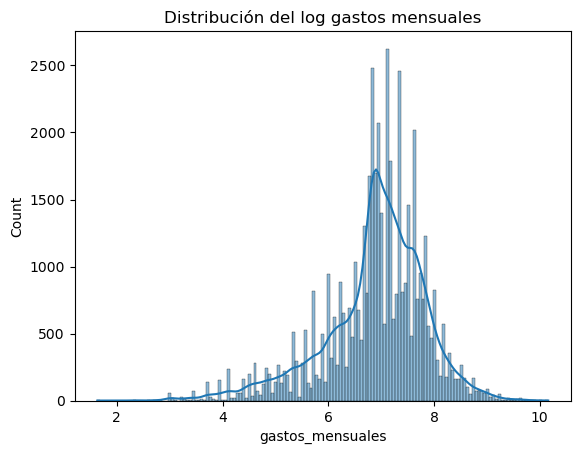

In [52]:
sns.histplot(data=data_demo,x='gastos_mensuales',kde=True)
plt.title('Distribución del log gastos mensuales')

<AxesSubplot:xlabel='edad', ylabel='Count'>

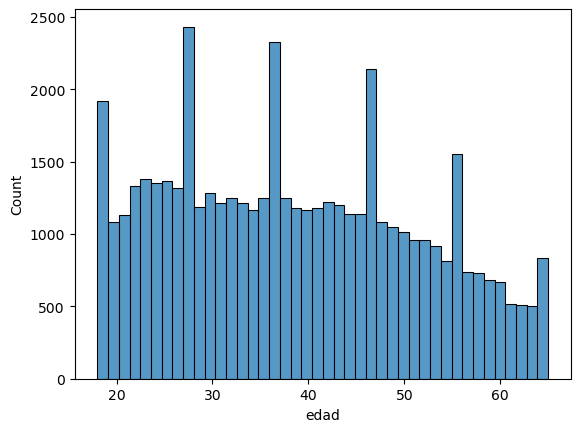

In [53]:
sns.histplot(data=data_demo,x='edad')

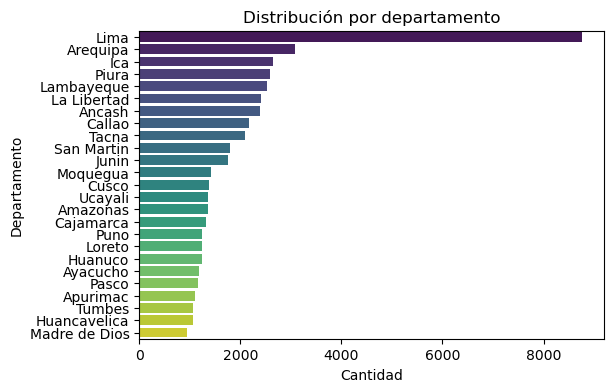

In [54]:
#cantidad de obs por departamento luego del filtro
dist_depart = data_demo.iddep.value_counts()

dist_df = dist_depart.reset_index()
dist_df.columns = ['Departamento', 'Cantidad']

plt.figure(figsize=(6, 4))
sns.barplot(x='Cantidad', y='Departamento', data=dist_df, hue='Departamento', palette='viridis', legend=False)
plt.title('Distribución por departamento')
plt.xlabel('Cantidad')
plt.ylabel('Departamento')
plt.show()

Hay más observaciones para Lima, lo cual representa un 17.8%.

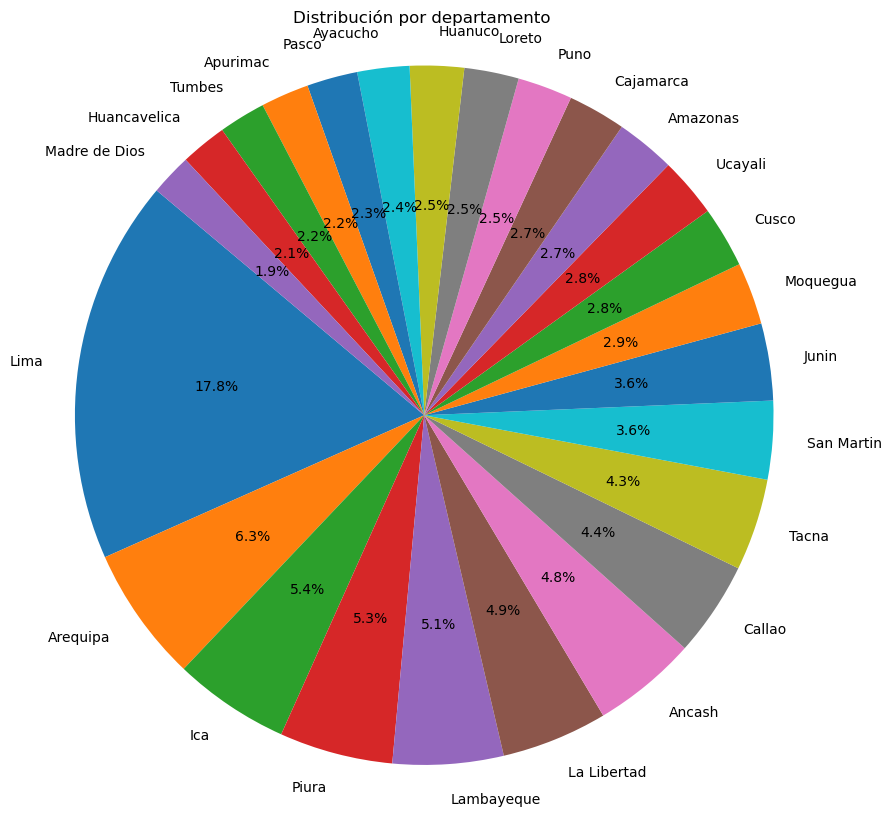

In [55]:
plt.figure(figsize=(10, 10))
plt.pie(dist_depart, labels=dist_depart.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución por departamento')
plt.axis('equal')  # circular
plt.show()

Método del rango intercuartílico (IQR): Este método implica calcular el rango intercuartílico (IQR), que es la diferencia entre el tercer y el primer cuartil de los datos. Los outliers se identifican como aquellos puntos de datos que están por encima del tercer cuartil más 1.5 veces el IQR o por debajo del primer cuartil menos 1.5 veces el IQR. Este método es robusto y no depende de la distribución de los datos.

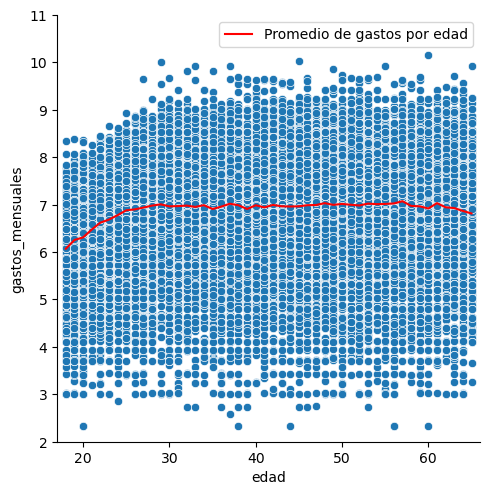

<Figure size 640x480 with 0 Axes>

In [62]:
mean_gastos_by_edad = data_demo.groupby('edad')['gastos_mensuales'].mean()

sns.relplot(data=data_demo, x='edad', y='gastos_mensuales')
plt.plot(mean_gastos_by_edad.index, mean_gastos_by_edad, color='red', label='Promedio de gastos por edad')
plt.xlim((17,66)) 
plt.ylim((2, 11))
plt.legend()
plt.show()

plt.savefig('../results/gastos_edad.jpg')


Si tomamos el promedio de gastos por edad de nuestra muestra filtrada, hay una relación creciente entre los gastos mensuales y la edad hasta los 28-30 años, pero está relación se vuelve constante hasta 55 años aproximandamente. Luego de los 55 años, hay una ligera tendencia decreciente. 

#### Eliminación de outliers 



In [63]:
# Calcular los límites del box plot
Q1 = data_demo['gastos_mensuales'].quantile(0.25)
Q3 = data_demo['gastos_mensuales'].quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar y eliminar outliers
outliers = data_demo[(data_demo['gastos_mensuales'] < limite_inferior) | (data_demo['gastos_mensuales'] > limite_superior)]
df_sin_outliers = data_demo[(data_demo['gastos_mensuales'] >= limite_inferior) & (data_demo['gastos_mensuales'] <= limite_superior)]


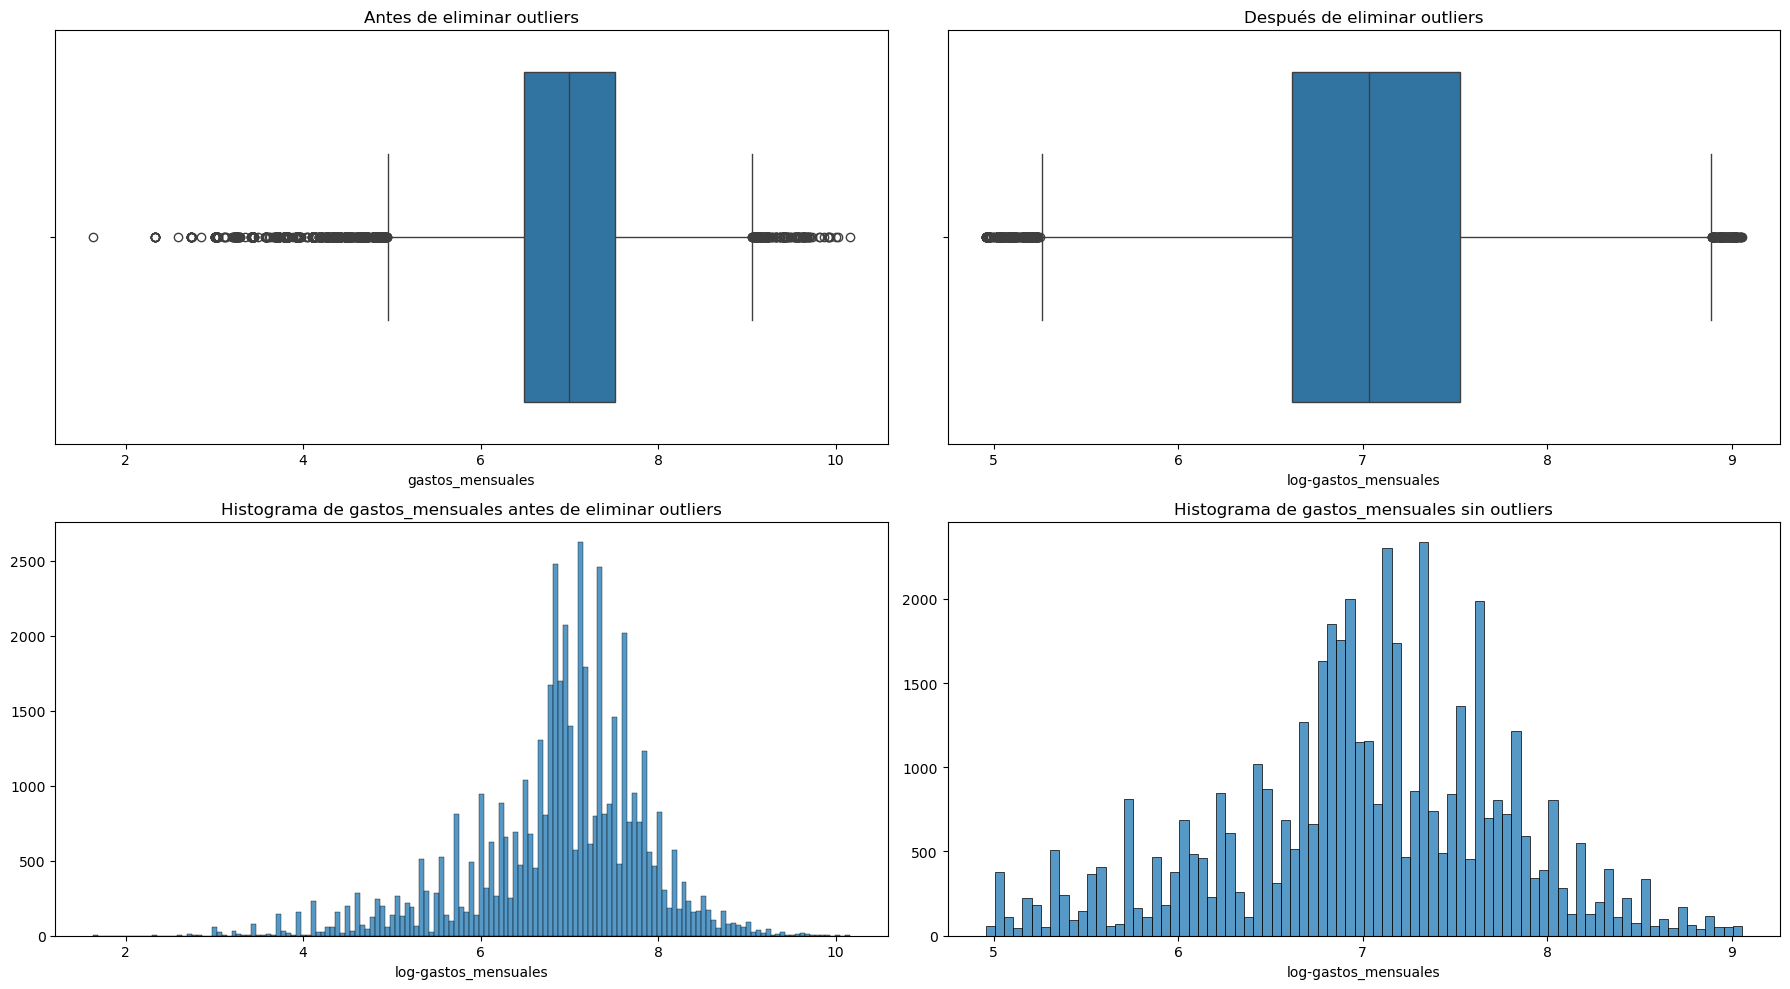

<Figure size 640x480 with 0 Axes>

In [65]:
fig, ax = plt.subplots(2, 2, figsize=(18, 10))

sns.boxplot(x=data_demo['gastos_mensuales'], ax=ax[0, 0])  # Box plot antes de eliminar outliers
ax[0, 0].set_title('Antes de eliminar outliers')


sns.boxplot(x=df_sin_outliers['gastos_mensuales'], ax=ax[0, 1])  # Box plot después de eliminar outliers
ax[0, 1].set_title('Después de eliminar outliers')
ax[0, 1].set_xlabel('log-gastos_mensuales')

sns.histplot(data=data_demo, x='gastos_mensuales', ax=ax[1, 0])
ax[1, 0].set_title('Histograma de gastos_mensuales antes de eliminar outliers')
ax[1, 0].set_xlabel('log-gastos_mensuales')
ax[1, 0].set_ylabel('')

sns.histplot(data=df_sin_outliers, x='gastos_mensuales', ax=ax[1, 1])
ax[1, 1].set_title('Histograma de gastos_mensuales sin outliers')
ax[1, 1].set_xlabel('log-gastos_mensuales')
ax[1, 1].set_ylabel('')

plt.tight_layout() 
plt.show()

plt.savefig('../results/log_gastos.jpg')


In [66]:
# Cambian las estadísticas luego de eliminar los outliers
print('# de obs. antes de eliminar outliers:', len(data_demo))  
print('Media de los gastos mensuales antes de eliminar outliers',data_demo['gastos_mensuales'].mean()) 

print('Número de outliers eliminados',len(outliers))    

print('# de obs. depués de eliminar outliers:',len(df_sin_outliers))  
print('Media de los gastos mensuales después de eliminar outliers',df_sin_outliers['gastos_mensuales'].mean())  

# de obs. antes de eliminar outliers: 49313
Media de los gastos mensuales antes de eliminar outliers 6.890984073884526
Número de outliers eliminados 2579
# de obs. depués de eliminar outliers: 46734
Media de los gastos mensuales después de eliminar outliers 7.0102972175359985


In [67]:
data_demo = df_sin_outliers #asigno la data sin outliers a la data con la que estoy trabajando 
data_demo.head()

,año,male,edad,casado,educacion,enfermedad_cronica,seguro_essalud,seguro_privado,seguro_eps,seguro_policial,seguro_sis,tamaño_empresa,gastos_mensuales,iddep,agua_potable,electricidad,telefono,celular,tv,internet
0,2018,0.0,49.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,4.0,6.778253,Amazonas,1.0,1.0,0.0,1.0,1.0,1.0
1,2018,0.0,22.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,6.940743,Amazonas,1.0,1.0,0.0,1.0,1.0,1.0
2,2018,0.0,21.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6.247596,Amazonas,1.0,1.0,0.0,1.0,1.0,1.0
5,2018,1.0,60.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,7.277227,Amazonas,1.0,1.0,0.0,1.0,1.0,0.0
6,2018,0.0,58.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,5.043458,Amazonas,1.0,1.0,0.0,1.0,1.0,0.0


## Gráficos de las variables 

In [68]:
#creamos una data_variables para hacer ciertos cambios para los gráficos 
data_variables = data_demo
data_variables = data_variables[(data_variables['iddep']=='Lima')] # nos quedamos solo con Lima
data_variables.head()

,año,male,edad,casado,educacion,enfermedad_cronica,seguro_essalud,seguro_privado,seguro_eps,seguro_policial,seguro_sis,tamaño_empresa,gastos_mensuales,iddep,agua_potable,electricidad,telefono,celular,tv,internet
5492,2018,0.0,22.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,7.123654,Lima,1.0,1.0,1.0,1.0,1.0,1.0
5493,2018,0.0,19.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.097336,Lima,1.0,1.0,1.0,1.0,1.0,1.0
5494,2018,1.0,45.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,6.778834,Lima,1.0,1.0,0.0,1.0,1.0,1.0
5495,2018,0.0,43.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,7.201611,Lima,1.0,1.0,0.0,1.0,1.0,1.0
5499,2018,1.0,48.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.778834,Lima,1.0,1.0,0.0,1.0,1.0,1.0


In [69]:
#las q tienen 2 categorías
d_graph_cat_2 = data_variables[['male','casado', 'enfermedad_cronica', 
                                'seguro_essalud', 'seguro_privado', 'seguro_eps',
                                'seguro_policial', 'seguro_sis','agua_potable',
                                'electricidad', 'telefono','celular', 'tv', 'internet',]]

#las q tienen 4 categorías
d_graph_cat_4 = data_variables[[ 'educacion','tamaño_empresa']]

#variables continuas
d_graph_cont = data_variables[['edad','gastos_mensuales']]

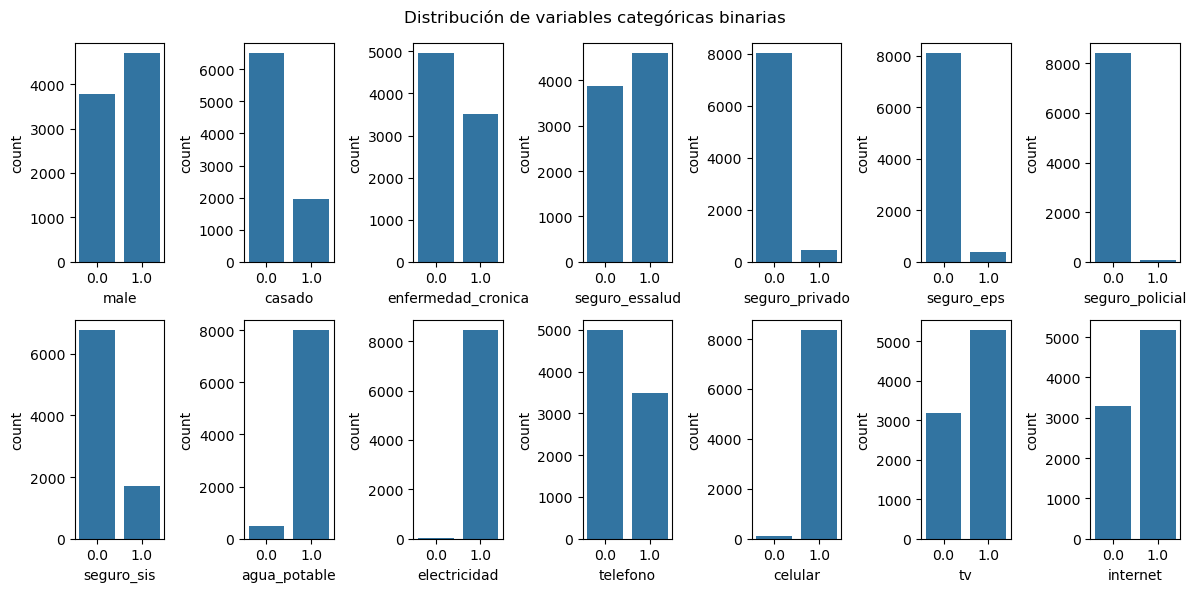

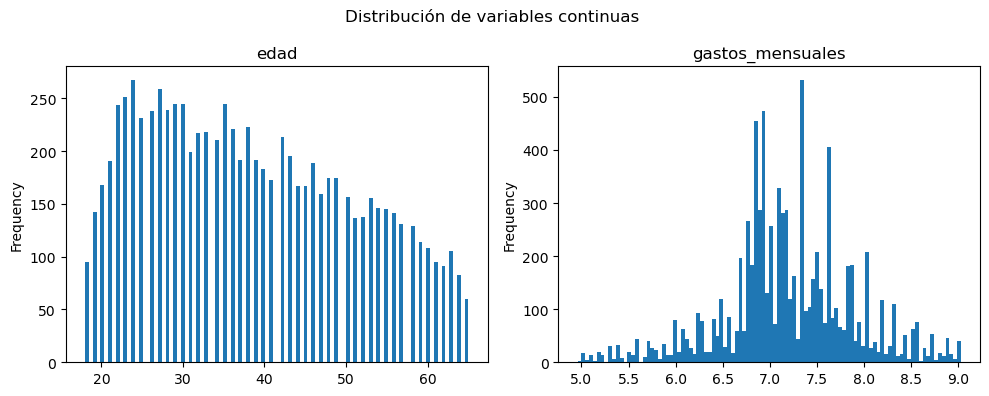

<Figure size 640x480 with 0 Axes>

In [71]:
# Categoricas de 2
fig, axes = plt.subplots(2, 7, figsize=(12, 6))
axes = axes.flatten()

ax_idx = 0

columns = d_graph_cat_2.columns

for col in columns:
    sns.countplot(x=col, data=d_graph_cat_2, ax=axes[ax_idx])
    ax_idx += 1

plt.suptitle('Distribución de variables categóricas binarias')
plt.tight_layout()
plt.show()


#variables continuas
columns = d_graph_cont.columns

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes = axes.flatten()
ax_idx = 0
columns = d_graph_cont.columns
for col in columns:
    d_graph_cont[col].plot(kind='hist', ax=axes[ax_idx], title=col,bins=100)
    ax_idx += 1
plt.suptitle('Distribución de variables continuas ')
plt.tight_layout()
plt.show()

plt.savefig('../results/variables_distribucion.jpg')

Para la población de 18 a 65 años en Lima (sin Callao) en el Perú, se observa lo siguiente: El 55.45% de los individuos son hombres, mientras que el 44.55% son mujeres. Respecto al estado civil, el 76.80% de la población no está casada, mientras que el 23.20% sí lo está. En cuanto a la presencia de enfermedades crónicas, el 41.48% de las personas reportan tener alguna. Respecto a la cobertura de seguro de salud, el 54.31% cuenta con seguro Essalud, el 5.39% tiene seguro privado, el 4.32% está asegurado en EPS y el 20.08% cuenta con seguro SIS, mientras que el 0.71% tiene seguro policial. En términos de servicios básicos, el 94.45% de los hogares tiene acceso a agua potable, el 99.67% cuenta con electricidad, el 41.10% tiene teléfono, el 98.59% dispone de celular, el 62.28% posee televisión y el 61.04% tiene acceso a internet. Estos datos proporcionan una visión general de la distribución de características demográficas y de servicios básicos en la población de estudio.

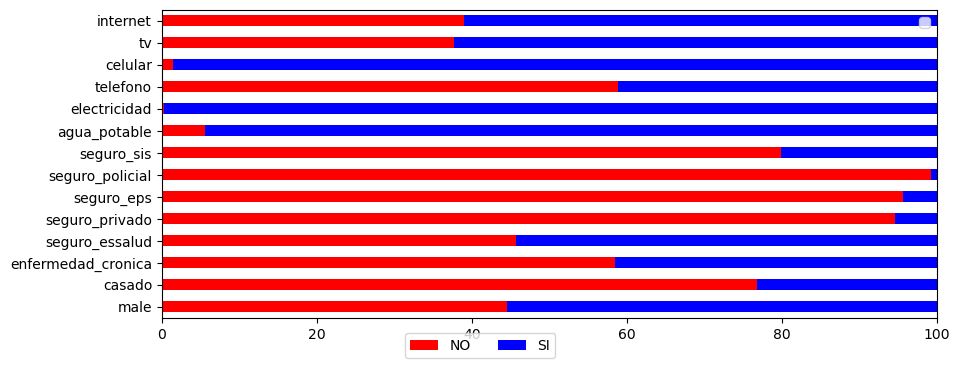

In [72]:
fig, ax = plt.subplots(figsize=(10, 4))
counts = d_graph_cat_2.apply(d_graph_cat_2.value_counts, normalize=True) * 100
counts.T.plot(kind='barh', stacked=True, ax=ax, color=['red', 'blue'])
ax.legend([], [])
ax.set_xlim(0, 100) 
    
fig.legend(['NO', 'SI'], loc='lower center', ncol=2)
plt.show()

Los resultados muestran los porcentajes de diferentes categorías para tamaño de empresa y nivel de educación para los encuestados en Lima de 18 a 65 años de edad.

Para el tamaño de la empresa, el mayor porcentaje se observa en la categoría 1.0, que representa el 56.87% de los encuestados. Esto sugiere que la mayoría de las personas encuestadas trabajan en empresas consideradas pequeñas. Le sigue la categoría 4.0 con el 32.33%, lo que indica una proporción significativa de personas que trabajan en empresas de mediano tamaño. Las categorías 3.0 y 2.0 tienen porcentajes más bajos, representando el 6.83% y el 3.97% respectivamente, lo que indica que una minoría trabaja en empresas grandes o muy pequeñas.

En cuanto al nivel de educación, la categoría más común es la 2.0, que representa el 50.28% de los encuestados. Esto sugiere que la mitad de la población encuestada tiene un nivel educativo medio. Le sigue la categoría 3.0 con el 30.89%, lo que indica una proporción significativa de personas con educación secundaria. Las categorías 1.0 y 4.0 tienen porcentajes más bajos, representando el 14.70% y el 4.13% respectivamente, lo que indica que una minoría tiene educación primaria o educación superior.


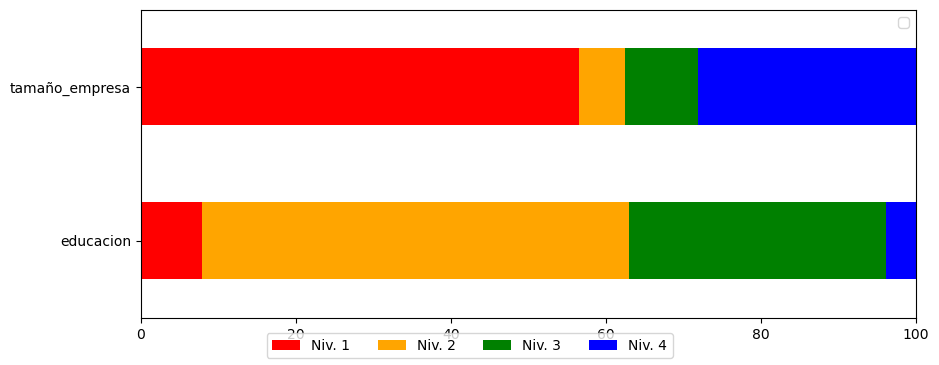

In [73]:
fig, ax = plt.subplots(figsize=(10, 4))
counts = d_graph_cat_4.apply(d_graph_cat_4.value_counts, normalize=True) * 100
counts.T.plot(kind='barh', stacked=True, ax=ax, color=['red','orange','green','blue'])    
ax.legend([], [])
ax.set_xlim(0, 100) 
   
fig.legend(['Niv. 1', 'Niv. 2','Niv. 3','Niv. 4'], loc='lower center', ncol=4)
plt.show()

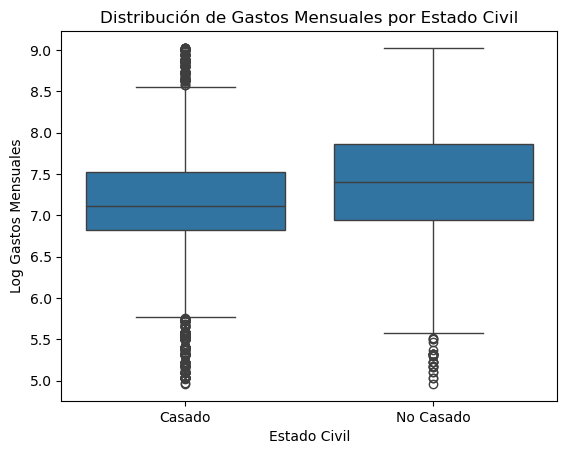

In [74]:
# Etiquetas personalizadas - eje x
xticklabels = ['Casado', 'No Casado']

# Gráfico de caja (boxplot)
ax = sns.boxplot(data=data_variables, x='casado', y='gastos_mensuales')
ax.set_xticklabels(xticklabels)  
plt.title('Distribución de Gastos Mensuales por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Log Gastos Mensuales')
plt.show()

Las personas casadas gastan más en promedio que las solteras.En promedio, las personas casadas tienden a tener un nivel de gastos mensuales más alto en comparación con las personas no casadas.Además, la dispersión de los gastos mensuales para personas casadas, medida por la desviación estándar, es un poco mayor, en comparación con las personas no casadas. Esto podría indicar una mayor variabilidad en los gastos entre las personas casadas. En cuanto a la mediana (percentil 50%), que proporciona una medida de tendencia central robusta ante valores atípicos, vemos que tanto para personas casadas como no casadas, los valores son cercanos (7.40 y 7.11 respectivamente), lo que sugiere que la mitad de los individuos en ambos grupos tienen gastos mensuales inferiores a estos valores. Aunque las personas casadas tienen un gasto mensual promedio ligeramente más alto en comparación con las no casadas, la diferencia no es muy significativa. Sin embargo, la mayor dispersión en los gastos mensuales entre las personas casadas podría indicar una mayor variabilidad en los hábitos de gasto en este grupo.

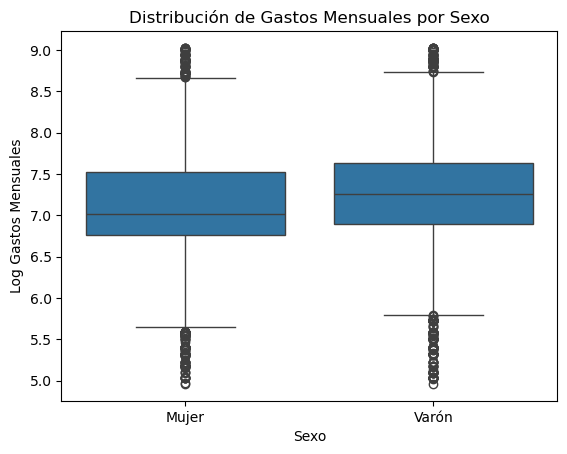

In [75]:
# Etiquetas personalizadas para el eje x
xticklabels = ['Mujer', 'Varón']

# Gráfico de caja (boxplot)
ax = sns.boxplot(data=data_variables, x='male', y='gastos_mensuales')
ax.set_xticklabels(xticklabels)  
plt.title('Distribución de Gastos Mensuales por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Log Gastos Mensuales')
plt.show()

Al contrastar los de gastos mensuales entre hombres y mujeres en Lima, de 18 a 65 años, se evidencia que, en promedio, los hombres tienden a tener gastos ligeramente superiores. Además, la variabilidad de los gastos, medida por la desviación estándar, es similar entre ambos grupos. Sin embargo, la mediana revela que, a pesar de que la mayoría de los hombres gastan más que la mayoría de las mujeres, la diferencia no es significativa, lo que sugiere una distribución de gastos más uniforme entre los hombres. Esta discrepancia podría deberse a factores socioeconómicos, como diferencias en ingresos, roles familiares, preferencias de compra y acceso a recursos financieros, que podrían influir en los patrones de gastos entre hombres y mujeres en la capital.

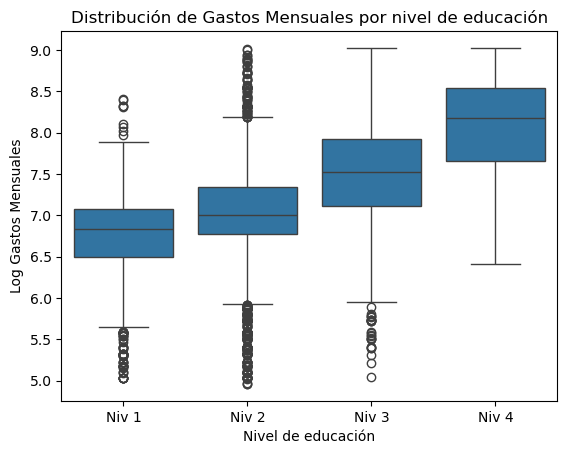

In [76]:
# Etiquetas personalizadas para el eje x
xticklabels = ['Niv 1', 'Niv 2','Niv 3','Niv 4']

# Gráfico de caja (boxplot)
ax = sns.boxplot(data=data_variables, x='educacion', y='gastos_mensuales')
ax.set_xticklabels(xticklabels)  
plt.title('Distribución de Gastos Mensuales por nivel de educación')
plt.xlabel('Nivel de educación')
plt.ylabel('Log Gastos Mensuales')
plt.show()

se observa que aquellos empleados en empresas de mayor tamaño tienden a tener gastos mensuales más elevados en comparación con aquellos que trabajan en empresas más pequeñas. Esto se refleja en las medias de gastos mensuales, donde las personas empleadas en empresas de tamaño 4 tienen la media más alta, seguidas por las de tamaño 3, tamaño 2 y finalmente tamaño 1 (6.95). Esta tendencia sugiere una relación entre el tamaño de la empresa y el nivel de ingresos y/o beneficios laborales, ya que generalmente las empresas más grandes ofrecen salarios y beneficios más altos, lo que podría permitir a sus empleados tener mayores capacidades de gasto. Además, se observa que la variabilidad de los gastos, medida por la desviación estándar, también aumenta con el tamaño de la empresa, lo que puede deberse a una mayor diversidad en los niveles de ingresos y estilos de vida entre los empleados de empresas más grandes.

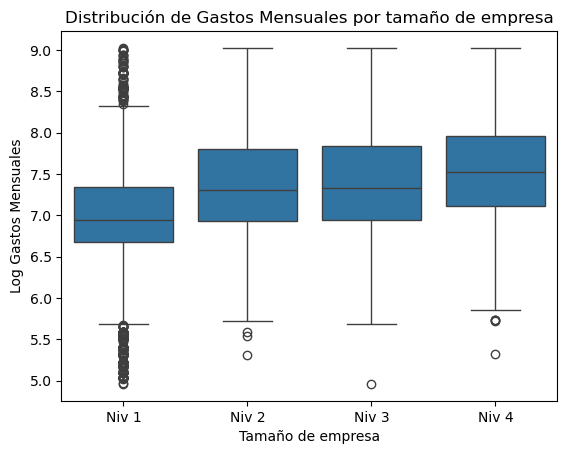

In [77]:
# Etiquetas personalizadas para el eje x
xticklabels = ['Niv 1', 'Niv 2','Niv 3','Niv 4']

# Gráfico de caja (boxplot)
ax = sns.boxplot(data=data_variables, x='tamaño_empresa', y='gastos_mensuales')
ax.set_xticklabels(xticklabels)  
plt.title('Distribución de Gastos Mensuales por tamaño de empresa')
plt.xlabel('Tamaño de empresa')
plt.ylabel('Log Gastos Mensuales')
plt.show()

Se aprecia una tendencia creciente en los gastos mensuales a medida que aumenta el nivel educativo. Aquellos con niveles educativos más altos tienden a tener gastos mensuales más elevados en comparación con aquellos con niveles educativos más bajos. Esto se evidencia en las medias de gastos mensuales, donde las personas con educación nivel 4 (universitaria completa o superior) tienen la media más alta, seguidas por las de nivel 3 (secundaria completa), nivel 2 (primaria completa) y finalmente nivel 1 (sin educación formal). Esta tendencia sugiere una posible relación entre el nivel educativo y los ingresos, así como el acceso a oportunidades laborales mejor remuneradas, lo que podría influir en los patrones de gastos. Además, se observa que la variabilidad de los gastos, medida por la desviación estándar, también aumenta con el nivel educativo, lo que puede reflejar diferencias en los ingresos y estilos de vida entre los diferentes niveles educativos.

## Creación  de dummies

In [78]:
data_demo = pd.get_dummies(data_demo, columns=['iddep'], prefix=['iddep'], dtype=int)
data_demo = pd.get_dummies(data_demo, columns=['educacion'], prefix=['educ'], dtype=int)
data_demo = pd.get_dummies(data_demo, columns=['año'], prefix=['año'], dtype=int)
data_demo = pd.get_dummies(data_demo, columns=['tamaño_empresa'], prefix=['tamaño_empresa'], dtype=int)
data_demo.columns

Index(['male', 'edad', 'casado', 'enfermedad_cronica', 'seguro_essalud',
       'seguro_privado', 'seguro_eps', 'seguro_policial', 'seguro_sis',
       'gastos_mensuales', 'agua_potable', 'electricidad', 'telefono',
       'celular', 'tv', 'internet', 'iddep_Amazonas', 'iddep_Ancash',
       'iddep_Apurimac', 'iddep_Arequipa', 'iddep_Ayacucho', 'iddep_Cajamarca',
       'iddep_Callao', 'iddep_Cusco', 'iddep_Huancavelica', 'iddep_Huanuco',
       'iddep_Ica', 'iddep_Junin', 'iddep_La Libertad', 'iddep_Lambayeque',
       'iddep_Lima', 'iddep_Loreto', 'iddep_Madre de Dios', 'iddep_Moquegua',
       'iddep_Pasco', 'iddep_Piura', 'iddep_Puno', 'iddep_San Martin',
       'iddep_Tacna', 'iddep_Tumbes', 'iddep_Ucayali', 'educ_1.0', 'educ_2.0',
       'educ_3.0', 'educ_4.0', 'año_2018', 'año_2019', 'tamaño_empresa_1.0',
       'tamaño_empresa_2.0', 'tamaño_empresa_3.0', 'tamaño_empresa_4.0'],
      dtype='object')

## **Revisión del dataset**

In [79]:
X = data_demo[['male', 'edad','casado', 'enfermedad_cronica','seguro_essalud',
       'seguro_privado', 'seguro_eps', 'seguro_policial', 'seguro_sis', 'agua_potable',
       'electricidad', 'telefono','celular', 'tv', 'internet', 'educ_1.0', 'educ_2.0', 'educ_3.0',
       'año_2018','iddep_Lima', 'tamaño_empresa_1.0', 'tamaño_empresa_2.0', 'tamaño_empresa_3.0']] 

y = data_demo[['gastos_mensuales']]

print(X.shape, y.shape)

(46734, 23) (46734, 1)


In [81]:
# ! NO MODIFICAR
# * Función creada para contar el porcentaje de missings existente por cada variable

def msv_1(data, thresh = 20, color = 'black', edgecolor = 'black', height = 3, width = 15):
    
    plt.figure(figsize = (width, height))
    percentage = (data.isnull().mean()) * 100
    percentage.sort_values(ascending = False).plot.bar(color = color, edgecolor = edgecolor)
    plt.axhline(y = thresh, color = 'r', linestyle = '-')
    
    plt.title('Porcentaje de missing values por columna', fontsize=20, weight='bold' , y=1.1)
    
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+2.5, f'Columns con más de {thresh}% missing values', fontsize=12, color='crimson',
         ha='left' ,va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 0.5, f'Columnas con menos de {thresh}% missing values', fontsize=12, color='green',
         ha='left' ,va='top')
    plt.xlabel('Columnas', size=15, weight='bold')
    plt.ylabel('Porcentaje de missing values')
    plt.yticks(weight ='bold')
    
    return plt.show()

plt.savefig('../results/porc_missigns.jpg')

<Figure size 640x480 with 0 Axes>

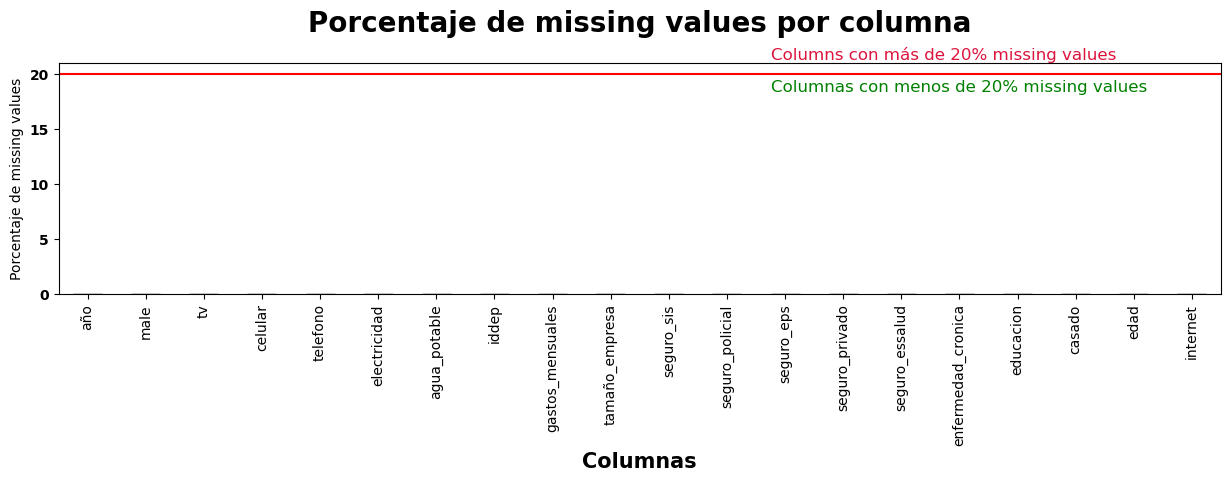

In [ ]:
msv_1(data_variables, 20, color=sns.color_palette('Reds',15))

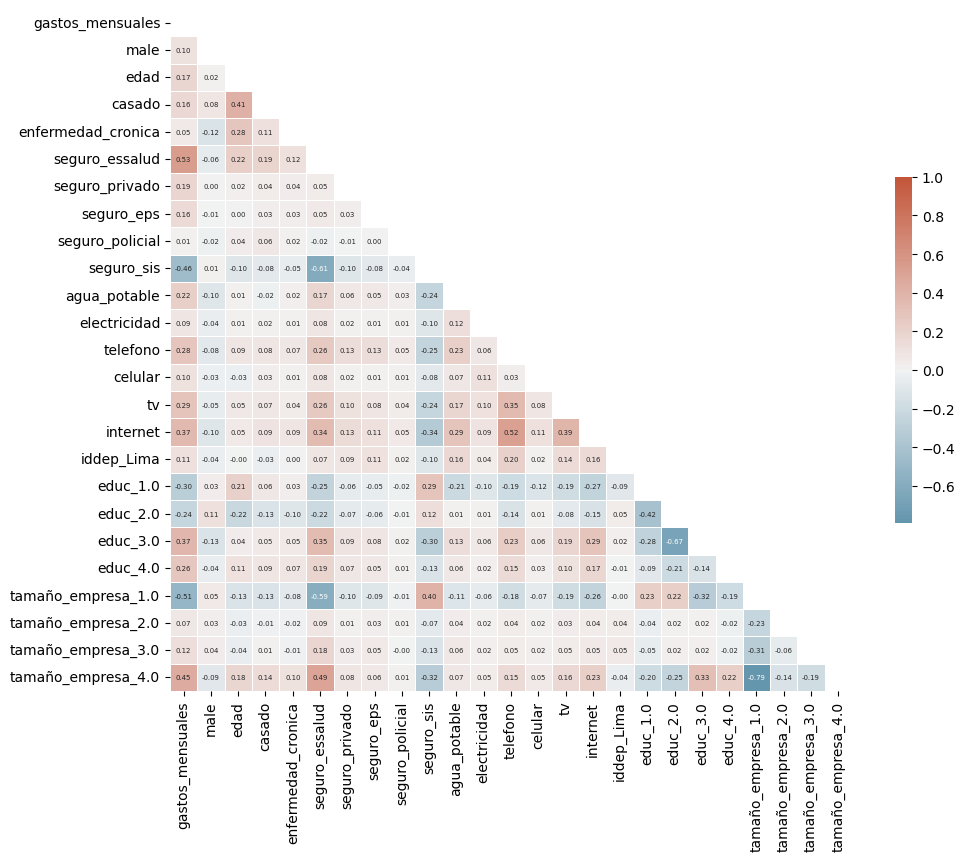

In [84]:
data_all_variables = data_demo[['gastos_mensuales', 'male', 'edad', 'casado', 'enfermedad_cronica', 'seguro_essalud',
       'seguro_privado', 'seguro_eps', 'seguro_policial', 'seguro_sis',
       'agua_potable', 'electricidad', 'telefono',
       'celular', 'tv', 'internet', 'iddep_Lima',
       'educ_1.0', 'educ_2.0', 'educ_3.0', 'educ_4.0',
       'tamaño_empresa_1.0', 'tamaño_empresa_2.0', 'tamaño_empresa_3.0',
       'tamaño_empresa_4.0']] 

corr = data_all_variables.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))
# Define una paleta de colores divergentes para el gráfico de calor.
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Trazar un mapa de calor de la matriz de correlación sin etiquetas.
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True, fmt=".2f",
            annot_kws={"size": 5})

plt.savefig('../results/corr_matrix.jpg')


## **Preparemos los insumos**

In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [86]:
def evaluar_modelo_regression(modelo, X_train, y_train, X_test, y_test):
    """
    Evalúa un modelo de regresión y devuelve las métricas MAPE, MPE y R^2 para
    los conjuntos de entrenamiento y prueba.

    Parámetros:
        modelo: El modelo de regresión ya ajustado.
        X_train: Las características del conjunto de entrenamiento.
        y_train: Las etiquetas del conjunto de entrenamiento.
        X_test: Las características del conjunto de prueba.
        y_test: Las etiquetas del conjunto de prueba.

    Retorna:
        Un diccionario que contiene las métricas MAPE, MPE y R^2 para los conjuntos
        de entrenamiento y prueba.
    """
    # Predicciones en conjunto de entrenamiento y prueba
    train_pred = modelo.predict(X_train)
    test_pred = modelo.predict(X_test)

    # Métricas en conjunto de entrenamiento
    train_r2 = r2_score(y_train, train_pred)
    train_mape = np.mean(np.abs((y_train - train_pred) / y_train)) * 100
    train_mpe = np.mean((y_train - train_pred) / y_train) * 100

    # Métricas en conjunto de prueba
    test_r2 = r2_score(y_test, test_pred)
    test_mape = np.mean(np.abs((y_test - test_pred) / y_test)) * 100
    test_mpe = np.mean((y_test - test_pred) / y_test) * 100

    # Retornar métricas
    return {
        "Conjunto de entrenamiento": {
            "R^2": train_r2,
            "MAPE": train_mape,
            "MPE": train_mpe
        },
        "Conjunto de prueba": {
            "R^2": test_r2,
            "MAPE": test_mape,
            "MPE": test_mpe
        }
    }

# Función print_evaluate(true, predicted): imprime las métricas de evaluación del modelo.
def print_evaluate(true, predicted):  
    mape = np.mean(np.abs((true - predicted) / true)) * 100  # Error porcentual absoluto medio (MAPE)
    mpe = np.mean((true - predicted) / true) * 100  # Error porcentual medio (MPE)
    r2_square = metrics.r2_score(true, predicted)  # Coeficiente de determinación R^2
    
    # Calcular el porcentaje de observaciones dentro del ±20% de MAPE
    ape = np.abs((true - predicted) / true) * 100
    within_20_percent = np.sum(ape <= 20) / len(true) * 100
    
    print('MAPE:', mape)
    print('MPE:', mpe)
    print('R2 Square:', r2_square)
    print('% Observaciones en ±20% de MAPE:', within_20_percent)
    print('__________________________________')

# <span style="color:blue">**MODELS**

## <span style="color:blue">**Reporte**

Observamos que el desempeño de los modelos varía entre los conjuntos de datos de entrenamiento y prueba. Algunos modelos, como la Regresión Lineal, la Regresión de Ridge y la Regresión de Ridge con optimización de hiperparámetros, muestran un rendimiento similar en ambos conjuntos de datos, lo que sugiere una generalización adecuada. Por otro lado, modelos como la Random Forest con 1000 y 1000 n_stimators muestran una diferencia notable entre los conjuntos de entrenamiento y prueba, lo que indica un posible sobreajuste en el conjunto de entrenamiento.

Los modelos de Linear Regression, Ridge, Robust y SVM muestran un rendimiento no tan variables entre el conjunto de entrenamiento como en el de prueba, lo que sugiere una capacidad para capturar la complejidad del conjunto de datos sin sobreajustarse. El SVM muestra un mejor rendimiento en el conjunto de prueba en términos de MAPE en comparación con el conjunto de entrenamiento, lo que sugiere que no hay evidencia clara de sobreajuste en el conjunto de entrenamiento. La discrepancia en los resultados de SVM entre los conjuntos de entrenamiento y prueba podría ser debido a otros factores como la complejidad del modelo o la aleatoriedad en los datos de prueba. Por lo tanto, podríamos decir que el SVM parece generalizar bien en datos no vistos, lo que es una buena señal en términos de capacidad predictiva.


|   | MODEL                                      | SET       | MAPE               | MPE                  | R^2               | ±20% of MAPE      | Rank. MAPE-SET TEST |
|---|--------------------------------------------|-----------|-------------------|----------------------|-------------------|-------------------|---------------------|
| 1 | Linear Regression                          | TRAIN SET | 6.240273019842247 | -0.6595431624577205  | 0.5055            | 96.386            |                     |
|   |                                            | TEST SET  | 6.347692931296519 | -0.7679674557747327  | 0.4893            | 96.205            | 4                   |
| 2 | Ridge Regression                           | TRAIN SET | 6.240271205851988 | -0.659554450343056   | 0.5055            | 96.386            |                     |
|   |                                            | TEST SET  | 6.347685984372683 | -0.7679784414253008  | 0.4893            | 96.212            | 3                   |
| 3 | Ridge Regression (GridSearch )  | TRAIN SET | 6.240230204713735 | -0.659711811691523   | 0.5055            | 96.384            |                     |
|   |                                            | TEST SET  | 6.34759064631998  | -0.7681905087167886  | 0.4893            | 96.212            | 2                   |
| 4 | Robust Regression (max_trials=100)         | TRAIN SET | 7.601279308952933 | -1.7029267004990694   | 0.2840            |  94.736            |                     |
|   |                                            | TEST SET  | 7.625571778054546 | -1.8152410992459862  | 0.2797           | 94.529            | 11                   |
| 5 | Robust Regression (max_trials=100000)        | TRAIN SET | 6.8615681031084605 | -2.6919400119380374  | 0.3915            | 93.635            |                     |
|   |                                            | TEST SET  | 6.944839842938853  | -2.8315899555064914  | 0.3774            | 93.509           | 9                   |
| 6 | LASSO Regression                           | TRAIN SET | 6.387234675554336 | -0.7329090423212753  | 0.4781            | 95.956            |                     |
|   |                                            | TEST SET  | 6.4526579278766745| -0.8476385929881011  | 0.4669            | 95.885            | 6                   |
| 7 | Elastic Net                                | TRAIN SET | 7.48815068062903  | -1.0586332107017233  | 0.2650            | 93.205            |                     |
|   |                                            | TEST SET  | 7.494159356188382 | -1.2378253572250526  | 0.2599            | 92.854            | 10                  |
| 8 | Polynomial Regression                     | TRAIN SET | 6.026114296461296 | -0.6227601348541828  | 0.5342            | 96.668            |                     |
|   |                                            | TEST SET  | 6.413561874069357 | -0.4833225171021721  | -9.9488           | 96.384            | 5                   |
| 9 | Random Forest Regressor (n_estimators=1000)| TRAIN SET | 3.440219760131052 | -0.29401568371768555 | 0.8251            | 99.339            |                     |
|   |                                            | TEST SET  | 6.7404421497565785| -0.705341916107837  | 0.4124            |  95.770           | 7                   |
|10 | Random Forest Regressor (n_estimators=10000)| TRAIN SET | 3.439217754205591 | -0.2934478497319546  | 0.8253            | 99.331            |                     |
|   |                                            | TEST SET  | 6.740882709557715 | -0.7066756358059456  | 0.4124            | 95.778            | 8                  |
|11 | Support Vector Machine                    | TRAIN SET | 5.984609851326252 | -1.2387802739096814  | 0.5310            | 96.047            |                     |
|   |                                            | TEST SET  | 6.140242779606647 | -1.3867226984380754  | 0.5073            | 95.813            | 1                   |


## <span style="color:blue">**Lineal regression**


In [87]:
# * Entrenamos el modelo
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAPE: 6.347692931296519
MPE: -0.7679674557747327
R2 Square: 0.4893056797734441
% Observaciones en ±20% de MAPE: gastos_mensuales    96.205691
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 6.240273019842247
MPE: -0.6595431624577205
R2 Square: 0.5055454051806938
% Observaciones en ±20% de MAPE: gastos_mensuales    96.386758
dtype: float64
__________________________________


In [88]:
# Obtener los coeficientes y los nombres de las columnas
coeficientes = model.coef_
nombres_columnas = X_train.columns
# Asegurarse de que los coeficientes sean 1D
coeficientes = coeficientes.flatten()
# Crear un DataFrame con los nombres de las columnas y los coeficientes
coeficientes_df = pd.DataFrame({'Columna': nombres_columnas, 'Coeficiente': coeficientes})
coeficientes_df

,Columna,Coeficiente
0,male,0.262136
1,edad,0.004827
2,casado,0.031894
3,enfermedad_cronica,-0.050524
4,seguro_essalud,0.259123
5,seguro_privado,0.451145
6,seguro_eps,0.456612
7,seguro_policial,-0.072274
8,seguro_sis,-0.158571
9,agua_potable,0.121395


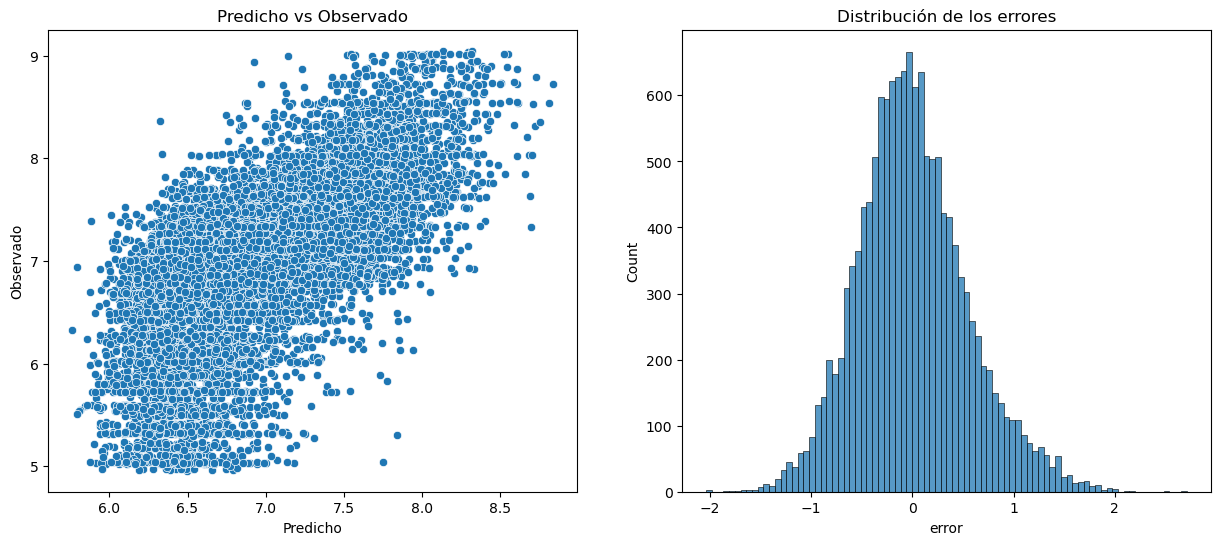

<Figure size 640x480 with 0 Axes>

In [90]:
# * Predicciones
# Calculamos la predicción
pred = model.predict(X_test)

# * Comparamos las predicciones con valores observados
# Creamos un DF
pred = pd.DataFrame(pred, columns=['prediccion_lr'])

# Lo unimos con la data observada
pred_lin_reg = pd.concat([pred, y_test.reset_index(drop=True)], axis=1, ignore_index=True)
pred_lin_reg.columns =['Predicho','Observado']

fig, axs = plt.subplots(1, 2, figsize=(15, 6))
#G0
sns.scatterplot(data=pred_lin_reg, x='Predicho',y='Observado', ax=axs[0])
axs[0].set_title('Predicho vs Observado')
#G1
pred_lin_reg['error'] = pred_lin_reg['Predicho'] - pred_lin_reg['Observado']
sns.histplot(data=pred_lin_reg, x='error', ax=axs[1])
axs[1].set_title('Distribución de los errores')

plt.show()

plt.savefig('../results/linear_reg.jpg')

## <span style="color:blue">**Ridge Regression**

- alpha = Controla la fuerza de la regularización aplicada al modelo.
- solver = especifica el algoritmo utilizado para resolver el problema de optimización asociado con el modelo Ridge
- tol = es la tolerancia utilizada para determinar la convergencia del algoritmo de optimización random_state= se utiliza para controlar la inicialización aleatoria del modelo y asegurar la reproducibilidad de los resultados.


In [91]:
model = Ridge(alpha=0.1, solver='cholesky', tol=0.00001, random_state=42)

model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAPE: 6.347685984372683
MPE: -0.7679784414253008
R2 Square: 0.48930663343004155
% Observaciones en ±20% de MAPE: gastos_mensuales    96.212824
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 6.240271205851988
MPE: -0.659554450343056
R2 Square: 0.505545403439043
% Observaciones en ±20% de MAPE: gastos_mensuales    96.386758
dtype: float64
__________________________________


#### GridSearchCV con Ridge

In [92]:
parametros = {'alpha': [0.1, 1.0, 10.0], 
              'solver': ['auto', 'svd', 'lsqr', 'sag', 'cholesky'], 
              'tol': [0.00001, 0.0001, 0.001]}
modelo = Ridge(random_state=42)

# inicializar la búsqueda de hiperparámetros
grid_search = GridSearchCV(modelo, parametros, cv=5, scoring='neg_mean_squared_error')

# Ajustar la búsqueda de hiperparámetros con los datos de entrenamiento
grid_search.fit(X_train, y_train)

# best model
mejor_modelo = grid_search.best_estimator_

# Eval.
evaluar_modelo_regression(mejor_modelo, X_train, y_train, X_test, y_test)


{'Conjunto de entrenamiento': {'R^2': 0.5055443800383783,
  'MAPE': 6.240259469275124,
  'MPE': -0.6596420528974528},
 'Conjunto de prueba': {'R^2': 0.4893178854235929,
  'MAPE': 6.347544325632867,
  'MPE': -0.7679796533114299}}

In [93]:
print("Mejores parámetros encontrados:", grid_search.best_params_)

Mejores parámetros encontrados: {'alpha': 1.0, 'solver': 'lsqr', 'tol': 1e-05}


In [94]:
model = Ridge(alpha=1.0, solver='sag', tol=0.0001, random_state=42)

model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAPE: 6.34759064631998
MPE: -0.7681905087167886
R2 Square: 0.48931711891086893
% Observaciones en ±20% de MAPE: gastos_mensuales    96.212824
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 6.240230204713735
MPE: -0.659711811691523
R2 Square: 0.5055451612227908
% Observaciones en ±20% de MAPE: gastos_mensuales    96.383701
dtype: float64
__________________________________


### Robustez 

Los cálculos del PCA están en el archivo ```main_pca.ipynb```

CON TODOS LOS SEGUROS:

|      | MAPE parámetros de clase         | MAPE con mejores parámetros hallados  | dif|
|------|-------------------|---------------------------------------|----|
|SET TEST | 6.347685984372683 | 6.34759064631998                 |9.533805270312001e-05 |
|SET TRAIN| 6.240271205851988| 6.240230204713735                     |4.100113825256102e-05 |



CON PCA:

|      | MAPE parámetros de clase         | MAPE con mejores parámetros hallados  | dif|
|------|-------------------|---------------------------------------|----|
|SET TEST | 6.359872811911852| 6.359799271875742                     |7.354003610959836e-05 |
|SET TRAIN| 6.250660523789153| 6.250620297434812                     |4.022635434086652e-05 |


La métrica "% Observaciones en ±20% de MAPE" indica el porcentaje de observaciones en el conjunto de datos que tienen un MAPE dentro de ±20%. Esta métrica proporciona una medida de cuántas de las predicciones del modelo se encuentran dentro de un rango aceptable de error en comparación con los valores reales. Un porcentaje alto en esta métrica sugiere que la mayoría de las predicciones del modelo tienen un error aceptable.


En parte de test set, el "% Observaciones en ±20% de MAPE" es del 96.37%, lo que significa que aproximadamente el 96.37% de las predicciones del modelo tienen un error porcentual absoluto medio dentro del ±20% en comparación con los valores reales. Esto indica que la mayoría de las predicciones del modelo tienen un error aceptable en el rango del ±20%.

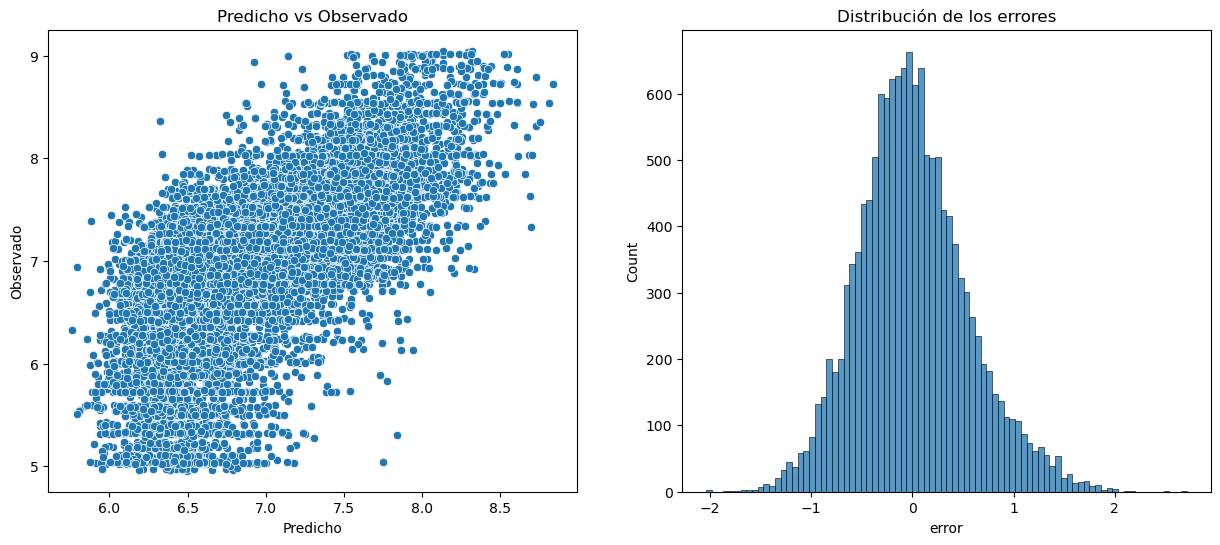

<Figure size 640x480 with 0 Axes>

In [96]:
# Comparamos las predicciones con valores observados
test_pred = pd.DataFrame(test_pred, columns=['prediccion_lr'])

pred_ridg_reg = pd.concat([test_pred, y_test.reset_index(drop=True)], axis=1, ignore_index=True)
pred_ridg_reg.columns =['Predicho','Observado']



# Creamos el subbloque 1x2
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Predicciones vs Observados
sns.scatterplot(data=pred_ridg_reg, x='Predicho', y='Observado', ax=axs[0])
axs[0].set_title('Predicho vs Observado')

# Gráfico 2: Distribución de los errores
pred_ridg_reg['error'] = pred_ridg_reg['Predicho'] - pred_ridg_reg['Observado']
sns.histplot(data=pred_ridg_reg, x='error', ax=axs[1])
axs[1].set_title('Distribución de los errores')

plt.show()

plt.savefig('../results/ridge.jpg')


In [ ]:
image.save('results/predic_predicho.jpg')


## **<span style="color:blue">Robust Regression**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import cross_val_score
from sklearn import metrics
import numpy as np

# Función print_evaluate(true, predicted): imprime las métricas de evaluación del modelo.
def print_evaluate(true, predicted):  
    mape = np.mean(np.abs((true - predicted) / true)) * 100  # Error porcentual absoluto medio (MAPE)
    mpe = np.mean((true - predicted) / true) * 100  # Error porcentual medio (MPE)
    r2_square = metrics.r2_score(true, predicted)  # Coeficiente de determinación R^2
    
    # Calcular el porcentaje de observaciones dentro del ±20% de MAPE
    ape = np.abs((true - predicted) / true) * 100
    within_20_percent = np.sum(ape <= 20) / len(true) * 100
    
    print('MAPE:', mape)
    print('MPE:', mpe)
    print('R2 Square:', r2_square)
    print('% Observaciones en ±20% de MAPE:', within_20_percent)
    print('__________________________________')

In [ ]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(max_trials=100) 
# max_trials es un parámetro utilizado en el algoritmo RANSAC (Random Sample Consensus) 
# que controla el número máximo de intentos o iteraciones que el algoritmo realizará para 
# ajustar un modelo a un conjunto de datos. 

model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluación:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluación:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluación:
_____________________________________
MAPE: 7.625571778054546
MPE: -1.8152410992459862
R2 Square: 0.2797184279949525
% Observaciones en ±20% de MAPE: gastos_mensuales    94.529634
dtype: float64
__________________________________
Train set evaluación:
_____________________________________
MAPE: 7.601279308952933
MPE: -1.7029267004990694
R2 Square: 0.2840855114981483
% Observaciones en ±20% de MAPE: gastos_mensuales    94.736038
dtype: float64
__________________________________


In [ ]:
from sklearn.linear_model import RANSACRegressor

model = RANSACRegressor(max_trials=100000) 
# max_trials es un parámetro utilizado en el algoritmo RANSAC (Random Sample Consensus) 
# que controla el número máximo de intentos o iteraciones que el algoritmo realizará para 
# ajustar un modelo a un conjunto de datos. 

model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluación:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluación:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluación:
_____________________________________
MAPE: 6.944839842938853
MPE: -2.8315899555064914
R2 Square: 0.3774716262031055
% Observaciones en ±20% de MAPE: gastos_mensuales    93.509735
dtype: float64
__________________________________
Train set evaluación:
_____________________________________
MAPE: 6.8615681031084605
MPE: -2.6919400119380374
R2 Square: 0.39152081403345995
% Observaciones en ±20% de MAPE: gastos_mensuales    93.635558
dtype: float64
__________________________________


Con un max_trials de 100 mil se obtuvo un MAPE:

|max_trials | TEST              |     TRAIN        |
|-----------|-------------------|------------------|
|100        | 7.204628912120848| 7.098035054019013 |
|100000     | 6.83528796942581 |6.756191671492545 |


Saved results:
100 MIL:
``` 
Test set evaluación:
_____________________________________
MAPE: 6.83528796942581
MPE: -2.1478856454401436
R2 Square: 0.39080350246921514
% Observaciones en ±20% de MAPE: gastos_mensuales    93.951929
dtype: float64
__________________________________
====================================
Train set evaluación:
_____________________________________
MAPE: 6.756191671492545
MPE: -2.0088169420164426
R2 Square: 0.40733976200869093
% Observaciones en ±20% de MAPE: gastos_mensuales    93.9871
dtype: float64
__________________________________
 ```


## <span style="color:blue">**LASSO Regression**

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.01, 
              precompute=True, 
              selection='random',
              random_state=42)
# alpha=0.1: El hiperparámetro alpha controla la fuerza de la regularización L1 (Lasso). 
# precompute=True: El parámetro precompute permite calcular la matriz de datos previamente para acelerar el ajuste del modelo en ciertos casos.
# selection='random': selection determina cómo se seleccionan las características durante el proceso de ajuste

model.fit(X_train, y_train)

test_pred = model.predict(X_test)
test_pred = test_pred.reshape(-1, 1)
train_pred = model.predict(X_train)
train_pred = train_pred.reshape(-1, 1)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAPE: 6.4526579278766745
MPE: -0.8476385929881011
R2 Square: 0.466854855895687
% Observaciones en ±20% de MAPE: gastos_mensuales    95.884744
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 6.387234675554336
MPE: -0.7329090423212753
R2 Square: 0.4781163885800199
% Observaciones en ±20% de MAPE: gastos_mensuales    95.955736
dtype: float64
__________________________________


## <span style="color:blue">**Elastic Net**

In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


modelEN = ElasticNet(alpha=0.1, l1_ratio=1, selection='random', random_state=42)
# alpha=0.1: El hiperparámetro alpha controla la fuerza de la regularización en ElasticNet. Un valor mayor de alpha aumenta la regularización, similar a Lasso.
# l1_ratio=0.9: l1_ratio controla la proporción entre la penalización L1 (Lasso) y L2 (Ridge) en ElasticNet. Un valor de 1 significa penalización L1 pura (como Lasso), mientras que 0 significa penalización L2 pura (como Ridge). 


modelEN.fit(X_train, y_train)

test_pred = modelEN.predict(X_test)
test_pred = test_pred.reshape(-1, 1)
train_pred = modelEN.predict(X_train)
train_pred = train_pred.reshape(-1, 1)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Test set evaluation:
_____________________________________
MAPE: 7.494159356188382
MPE: -1.2378253572250526
R2 Square: 0.25987534475817464
% Observaciones en ±20% de MAPE: gastos_mensuales    92.853577
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 7.48815068062903
MPE: -1.0586332107017233
R2 Square: 0.26498359046315123
% Observaciones en ±20% de MAPE: gastos_mensuales    93.204536
dtype: float64
__________________________________


## <span style="color:blue">**Polynomial Regression**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=2)
# degree=2: El parámetro degree indica el grado del polinomio al que se elevarán las características originales. 
X_train_2_d = poly_reg.fit_transform(X_train)
X_test_2_d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2_d,y_train)

test_pred = lin_reg.predict(X_test_2_d)
test_pred = test_pred.reshape(-1, 1)
train_pred = lin_reg.predict(X_train_2_d)
train_pred = train_pred.reshape(-1, 1)


# *************
# * EVALUACIÓN
# *************

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAPE: 6.413561874069357
MPE: -0.4833225171021721
R2 Square: -9.9487766367081
% Observaciones en ±20% de MAPE: gastos_mensuales    96.383995
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 6.026114296461296
MPE: -0.6227601348541828
R2 Square: 0.534163388066957
% Observaciones en ±20% de MAPE: gastos_mensuales    96.667991
dtype: float64
__________________________________


## <span style="color:blue">**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=1000)
# n_estimators=1000: El parámetro n_estimators controla el número de árboles de decisión que se utilizarán en el bosque aleatorio.

rf_reg.fit(X_train, y_train)

test_pred = rf_reg.predict(X_test)
test_pred = test_pred.reshape(-1, 1)
train_pred = rf_reg.predict(X_train)
train_pred = train_pred.reshape(-1, 1)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

Test set evaluation:
_____________________________________
MAPE: 6.7404421497565785
MPE: -0.705341916107837
R2 Square: 0.4124081851930925
% Observaciones en ±20% de MAPE: gastos_mensuales    95.77063
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 3.440219760131052
MPE: -0.29401568371768555
R2 Square: 0.8251475745463908
% Observaciones en ±20% de MAPE: gastos_mensuales    99.339712
dtype: float64
__________________________________


Saved results:

```
Test set evaluation:
_____________________________________
MAPE: 6.7417511688316365
MPE: -0.6976317062700724
R2 Square: 0.4120655765636113
% Observaciones en ±20% de MAPE: gastos_mensuales    95.777762
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 3.440613272649276
MPE: -0.2917871278896394
R2 Square: 0.8251165851639084
% Observaciones en ±20% de MAPE: gastos_mensuales    99.324428
dtype: float64
__________________________________  
```

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

# rf_reg = RandomForestRegressor(n_estimators=10000)
# # n_estimators=1000: El parámetro n_estimators controla el número de árboles de decisión que se utilizarán en el bosque aleatorio.

# rf_reg.fit(X_train, y_train)

# test_pred = rf_reg.predict(X_test)
# test_pred = test_pred.reshape(-1, 1)
# train_pred = rf_reg.predict(X_train)
# train_pred = train_pred.reshape(-1, 1)

# # *************
# # * EVALUACIÓN
# # *************

# print('Test set evaluation:\n_____________________________________')
# print_evaluate(y_test, test_pred)

# print('Train set evaluation:\n_____________________________________')
# print_evaluate(y_train, train_pred)


Saved results:
```
Test set evaluation:
_____________________________________
MAPE: 6.740882709557715
MPE: -0.7066756358059456
R2 Square: 0.4123544254287954
% Observaciones en ±20% de MAPE: gastos_mensuales    95.777762
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 3.439217754205591
MPE: -0.2934478497319546
R2 Square: 0.8253197041929561
% Observaciones en ±20% de MAPE: gastos_mensuales    99.330541
dtype: float64
__________________________________
```

## <span style="color:blue">**Support Vector Machine**

In [97]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='rbf', C=1000, epsilon=0.05)
# kernel='rbf': El parámetro kernel especifica el tipo de kernel que se utilizará en el modelo. En este caso, se está utilizando el kernel radial (RBF, Radial Basis Function), que es uno de los kernels más comunes para SVM en problemas de regresión.
# C=1000000: El parámetro C controla el parámetro de regularización en el modelo. Un valor más alto de C permite que el modelo se ajuste más a los datos de entrenamiento, lo que puede llevar al sobreajuste si se establece demasiado alto. 
# epsilon=0.001: El parámetro epsilon determina el margen de error permitido en la regresión. 

svm_reg.fit(X_train, y_train)

test_pred = svm_reg.predict(X_test)
test_pred = test_pred.reshape(-1, 1)
train_pred = svm_reg.predict(X_train)
train_pred = train_pred.reshape(-1, 1)

# *************
# * EVALUACIÓN
# *************

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)

print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)


Saved results:
```
Test set evaluation:
_____________________________________
MAPE: 6.140242779606647
MPE: -1.3867226984380754
R2 Square: 0.5073205894985139
% Observaciones en ±20% de MAPE: gastos_mensuales    95.813423
dtype: float64
__________________________________
Train set evaluation:
_____________________________________
MAPE: 5.984609851326252
MPE: -1.2387802739096814
R2 Square: 0.5309702782921353
% Observaciones en ±20% de MAPE: gastos_mensuales    96.047443
dtype: float64
__________________________________
```

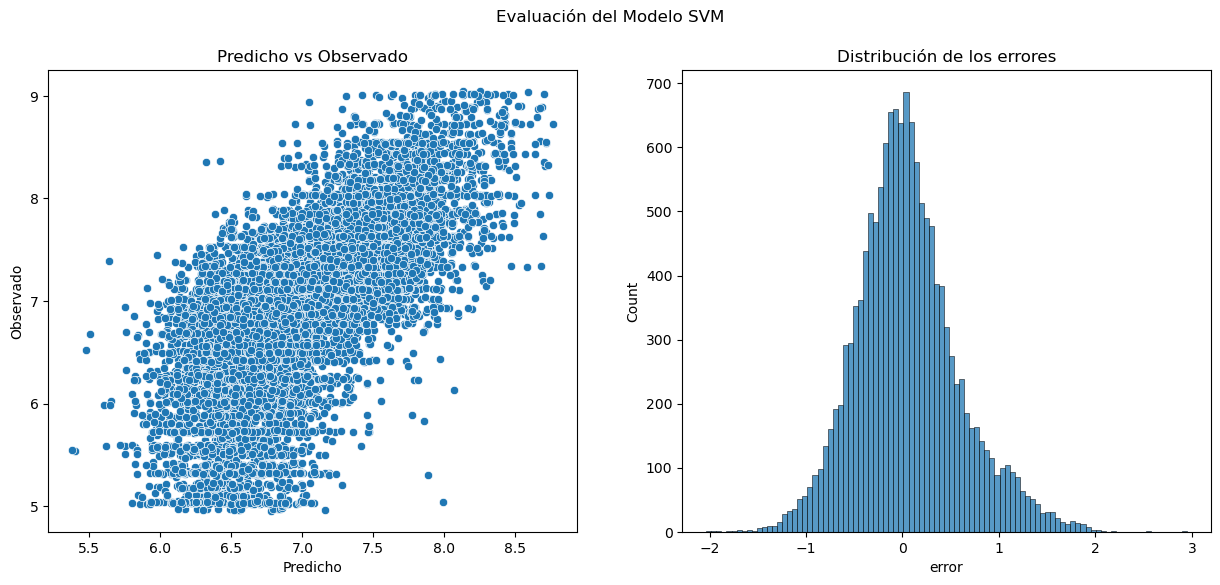

In [ ]:
# Comparamos las predicciones con valores observados
test_pred = pd.DataFrame(test_pred, columns=['prediccion_lr'])

pred_ridg_reg = pd.concat([test_pred, y_test.reset_index(drop=True)], axis=1, ignore_index=True)
pred_ridg_reg.columns =['Predicho','Observado']



# Creamos el subbloque 1x2
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Predicciones vs Observados
sns.scatterplot(data=pred_ridg_reg, x='Predicho', y='Observado', ax=axs[0])
axs[0].set_title('Predicho vs Observado')

# Gráfico 2: Distribución de los errores
pred_ridg_reg['error'] = pred_ridg_reg['Predicho'] - pred_ridg_reg['Observado']
sns.histplot(data=pred_ridg_reg, x='error', ax=axs[1])
axs[1].set_title('Distribución de los errores')

fig.suptitle('Evaluación del Modelo SVM')
plt.show()

plt.savefig('../results/SVM.jpg')


## <span style="color:blue">**Reporte**

|   | MODEL                                      | SET       | MAPE               | MPE                  | R^2               | ±20% of MAPE      | Rank. MAPE-SET TEST |
|---|--------------------------------------------|-----------|-------------------|----------------------|-------------------|-------------------|---------------------|
| 1 | Linear Regression                          | TRAIN SET | 6.240273019842247 | -0.6595431624577205  | 0.5055            | 96.386            |                     |
|   |                                            | TEST SET  | 6.347692931296519 | -0.7679674557747327  | 0.4893            | 96.205            | 4                   |
| 2 | Ridge Regression                           | TRAIN SET | 6.240271205851988 | -0.659554450343056   | 0.5055            | 96.386            |                     |
|   |                                            | TEST SET  | 6.347685984372683 | -0.7679784414253008  | 0.4893            | 96.212            | 3                   |
| 3 | Ridge Regression (GridSearch )  | TRAIN SET | 6.240230204713735 | -0.659711811691523   | 0.5055            | 96.384            |                     |
|   |                                            | TEST SET  | 6.34759064631998  | -0.7681905087167886  | 0.4893            | 96.212            | 2                   |
| 4 | Robust Regression (max_trials=100)         | TRAIN SET | 7.601279308952933 | -1.7029267004990694   | 0.2840            |  94.736            |                     |
|   |                                            | TEST SET  | 7.625571778054546 | -1.8152410992459862  | 0.2797           | 94.529            | 11                   |
| 5 | Robust Regression (max_trials=100000)        | TRAIN SET | 6.8615681031084605 | -2.6919400119380374  | 0.3915            | 93.635            |                     |
|   |                                            | TEST SET  | 6.944839842938853  | -2.8315899555064914  | 0.3774            | 93.509           | 9                   |
| 6 | LASSO Regression                           | TRAIN SET | 6.387234675554336 | -0.7329090423212753  | 0.4781            | 95.956            |                     |
|   |                                            | TEST SET  | 6.4526579278766745| -0.8476385929881011  | 0.4669            | 95.885            | 6                   |
| 7 | Elastic Net                                | TRAIN SET | 7.48815068062903  | -1.0586332107017233  | 0.2650            | 93.205            |                     |
|   |                                            | TEST SET  | 7.494159356188382 | -1.2378253572250526  | 0.2599            | 92.854            | 10                  |
| 8 | Polynomial Regression                     | TRAIN SET | 6.026114296461296 | -0.6227601348541828  | 0.5342            | 96.668            |                     |
|   |                                            | TEST SET  | 6.413561874069357 | -0.4833225171021721  | -9.9488           | 96.384            | 5                   |
| 9 | Random Forest Regressor (n_estimators=1000)| TRAIN SET | 3.440219760131052 | -0.29401568371768555 | 0.8251            | 99.339            |                     |
|   |                                            | TEST SET  | 6.7404421497565785| -0.705341916107837  | 0.4124            |  95.770           | 7                   |
|10 | Random Forest Regressor (n_estimators=10000)| TRAIN SET | 3.439217754205591 | -0.2934478497319546  | 0.8253            | 99.331            |                     |
|   |                                            | TEST SET  | 6.740882709557715 | -0.7066756358059456  | 0.4124            | 95.778            | 8                  |
|11 | Support Vector Machine                    | TRAIN SET | 5.984609851326252 | -1.2387802739096814  | 0.5310            | 96.047            |                     |
|   |                                            | TEST SET  | 6.140242779606647 | -1.3867226984380754  | 0.5073            | 95.813            | 1                   |


|   | MODEL                                      | SET       | MAPE               | MPE                  | R^2               | ±20% of MAPE      | Rank. MAPE-SET TRAIN |
|---|--------------------------------------------|-----------|-------------------|----------------------|-------------------|-------------------|---------------------|
| 1 | Linear Regression                          | TRAIN SET | 6.240273019842247 | -0.6595431624577205  | 0.5055            | 96.386            | 7                   |
|   |                                            | TEST SET  | 6.347692931296519 | -0.7679674557747327  | 0.4893            | 96.205            |                     |
| 2 | Ridge Regression                           | TRAIN SET | 6.240271205851988 | -0.659554450343056   | 0.5055            | 96.386            | 6                   |
|   |                                            | TEST SET  | 6.347685984372683 | -0.7679784414253008  | 0.4893            | 96.212            |                     |
| 3 | Ridge Regression (GridSearch ) | TRAIN SET | 6.240230204713735 | -0.659711811691523   | 0.5055            | 96.384            | 5                   |
|   |                                            | TEST SET  | 6.34759064631998  | -0.7681905087167886  | 0.4893            | 96.212            |                     |
| 4 | Robust Regression (max_trials=100)         | TRAIN SET | 7.098035054019013 | -2.793103322117688   | 0.3638            | 93.807            | 10                   |
|   |                                            | TEST SET  | 7.204628912120848 | -2.9051504790243396  | 0.3476            | 93.631
| 5 | Robust Regression (max_trials=100000)        | TRAIN SET | 6.756191671492545 | -2.0088169420164426  | 0.4073            | 93.987            | 9                   |
|   |                                            | TEST SET  | 6.83528796942581  | -2.1478856454401436  | 0.3908            | 93.952            |                     |            |                     |
| 6 | LASSO Regression                           | TRAIN SET | 6.387234675554336 | -0.7329090423212753  | 0.4781            | 95.956            | 8                   |
|   |                                            | TEST SET  | 6.4526579278766745| -0.8476385929881011  | 0.4669            | 95.885            |                     |
| 7 | Elastic Net                                | TRAIN SET | 7.48815068062903  | -1.0586332107017233  | 0.2650            | 93.205            | 11                  |
|   |                                            | TEST SET  | 7.494159356188382 | -1.2378253572250526  | 0.2599            | 92.854            |                     |
| 8 | Polynomial Regression                     | TRAIN SET | 6.026114296461296 | -0.6227601348541828  | 0.5342            | 96.668            | 4                   |
|   |                                            | TEST SET  | 6.413561874069357 | -0.4833225171021721  | -9.9488           | 96.384            |                     |
| 9 | Random Forest Regressor (n_estimators=1000)| TRAIN SET | 3.440613272649276 | -0.2917871278896394  | 0.8251            | 99.324            | 2                   |
|   |                                            | TEST SET  | 6.7417511688316365| -0.6976317062700724  | 0.4121            | 95.778            |                     |
| 10 | Random Forest Regressor (n_estimators=10000)| TRAIN SET | 3.439217754205591 | -0.2934478497319546  | 0.8253            | 99.331            | 1                  |
|   |                                            | TEST SET  | 6.740882709557715 | -0.7066756358059456  | 0.4124            | 95.778            |                     |
| 11 | Support Vector Machine                     | TRAIN SET | 5.984609851326252 | -1.2387802739096814  | 0.5310            | 96.047            | 3                   |
|   |                                            | TEST SET  | 6.140242779606647 | -1.3867226984380754  | 0.5073            | 95.813            |                     |


